# Project 5 : Buffer and spatial intersection

##  Group 4 : Esfandiar_Babaii_Sharifi

### *Import required libraries*

In [56]:
import random
import geopandas as gpd
import matplotlib.pyplot as plt

### *Read our shapeFile as a GeoDataFrame*

In [ ]:
africa = gpd.read_file('Layer.shp')
africa

### *Plot our ShapeFile*

Text(0.5, 1.0, 'Africa')

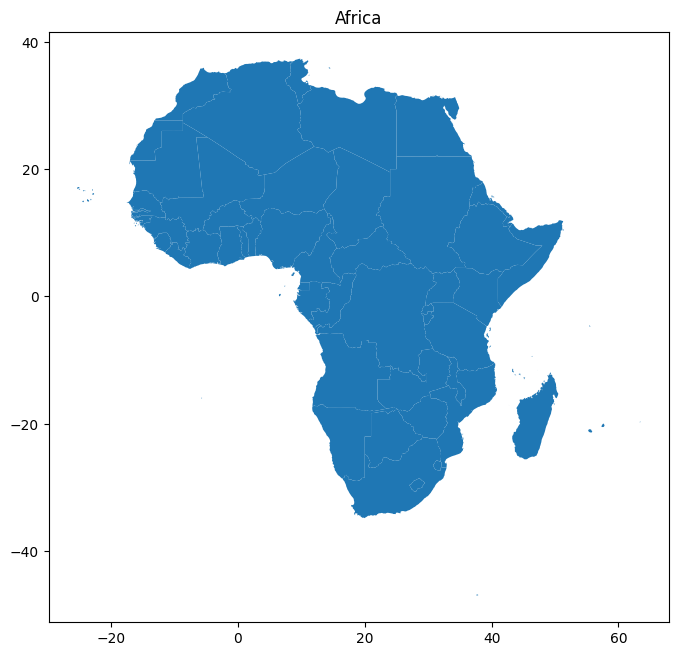

In [59]:
ax = africa.plot(figsize = (8, 8))
plt.title('Africa')

=========================================================================================================================

### *Select a random country from the GeoDataFrame*

In [38]:
#ID = int(input(f'Please select a country by ID (from 0 to {len(africa)} ) : '))
#country = africa.iloc[ID]

country = africa.sample(1)
country

,FIPS_CNTRY,GMI_CNTRY,ISO_2DIGIT,ISO_3DIGIT,CNTRY_NAME,LONG_NAME,SOVEREIGN,POP_CNTRY,CURR_TYPE,CURR_CODE,LANDLOCKED,SQKM,SQMI,COLOR_MAP,geometry
22,CT,CAF,CF,CAF,Central African Republic,Central African Republic,Central African Republic,3149545,CFA Franc,XOF,Y,621302.94,239885.05,3,"POLYGON ((20.45330 4.52379, 20.45798 4.61931, ..."


=========================================================================================================================

### *plot selected country*

Text(0.5, 1.0, 'Selected Country in Africa')

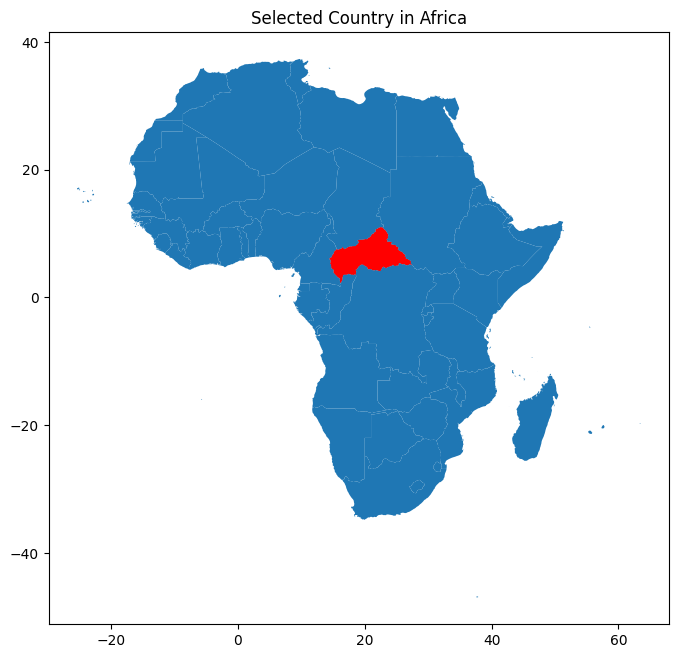

In [60]:
ax = africa.plot(figsize = (8, 8))
country.plot(ax = ax, color = 'red', figsize = (8, 8))
plt.title('Selected Country in Africa')

=========================================================================================================================

### *Create buffer around the selected country*

In [45]:
dist = 5
buff = country.buffer(dist)
#input_dist = float(input('Buffer distance = '))

Buffer distance = 1


C:\Users\shaha\AppData\Local\Temp\ipykernel_14776\616610402.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buff = country.buffer(dist)


### *Plot our Buffer*

Text(0.5, 1.0, '5(km) Buffer')

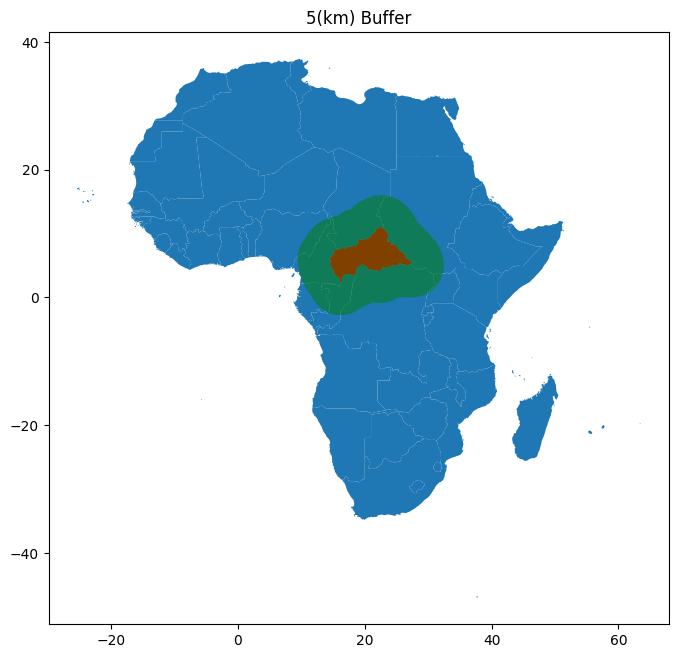

In [61]:
ax = africa.plot(figsize = (8, 8))
country.plot(ax = ax, color = 'red', figsize = (8, 8))
buff.plot(ax = ax, color = 'green', alpha=0.5, figsize = (8, 8))
plt.title(f'{dist}(km) Buffer')

=========================================================================================================================

### *Intersection between buffer and countries*

In [49]:
# Create spatial index 
sindex = africa.sindex

# Find the countries that within the buffer extent
neighbour_index = list(sindex.intersection(buff.bounds.iloc[0]))

# Find the countries that intersect with our buffer
intersect_buff = africa.iloc[neighbour_index][africa.intersects(buff.iloc[0])]
intersect_buff

D:\UNI\Venv\spatial-env\Lib\site-packages\geopandas\geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


,FIPS_CNTRY,GMI_CNTRY,ISO_2DIGIT,ISO_3DIGIT,CNTRY_NAME,LONG_NAME,SOVEREIGN,POP_CNTRY,CURR_TYPE,CURR_CODE,LANDLOCKED,SQKM,SQMI,COLOR_MAP,geometry
32,CG,ZAR,CD,COD,"Congo, DRC",Congo (Democratic Republic of the),"Congo, DRC",41025920,Zaire,ZRZ,N,2336803.25,902239.63,4,"POLYGON ((16.10007 -5.85937, 15.92833 -5.86139..."
30,UG,UGA,UG,UGA,Uganda,Uganda,Uganda,18144360,Schilling,UGX,Y,243157.38,93883.07,7,"POLYGON ((32.89035 -0.99971, 32.74242 -0.99972..."
10,SU,SDN,SD,SDN,Sudan,Sudan,Sudan,27713420,Dinar,SDD,N,2496005.50,963707.94,2,"POLYGON ((26.40628 6.63525, 26.40402 6.64403, ..."
27,GB,GAB,GA,GAB,Gabon,Gabon,Gabon,1561195,CFA Franc,XOF,N,261859.89,101104.11,1,"MULTIPOLYGON (((11.54429 -2.81657, 11.54278 -2..."
29,CF,COG,CG,COG,Congo,Congo (Republic of the),Congo,2318276,CFA Franc,XAF,N,345558.72,133420.22,8,"POLYGON ((15.89050 -3.94301, 15.88028 -3.95111..."
28,EK,GNQ,GQ,GNQ,Equatorial Guinea,Equatorial Guinea,Equatorial Guinea,386373,CFA Franc,XOF,N,27042.03,10440.93,8,"MULTIPOLYGON (((10.41505 1.00250, 10.30861 1.0..."
22,CT,CAF,CF,CAF,Central African Republic,Central African Republic,Central African Republic,3149545,CFA Franc,XOF,Y,621302.94,239885.05,3,"POLYGON ((20.45330 4.52379, 20.45798 4.61931, ..."
25,CM,CMR,CM,CMR,Cameroon,Cameroon,Cameroon,13218480,CFA Franc,XAF,N,466768.94,180219.47,7,"POLYGON ((10.18107 2.16786, 10.07389 2.16778, ..."
14,NI,NGA,NG,NGA,Nigeria,Nigeria,Nigeria,97228750,Naira,NGN,N,912245.00,352217.78,6,"MULTIPOLYGON (((11.79944 7.29666, 11.75496 7.2..."
15,CD,TCD,TD,TCD,Chad,Chad,Chad,6308708,CFA Franc,XOF,Y,1276294.13,492777.13,8,"POLYGON ((14.19477 9.98175, 14.45055 9.99805, ..."


=========================================================================================================================

### *Plot intersected countries with our buffer*

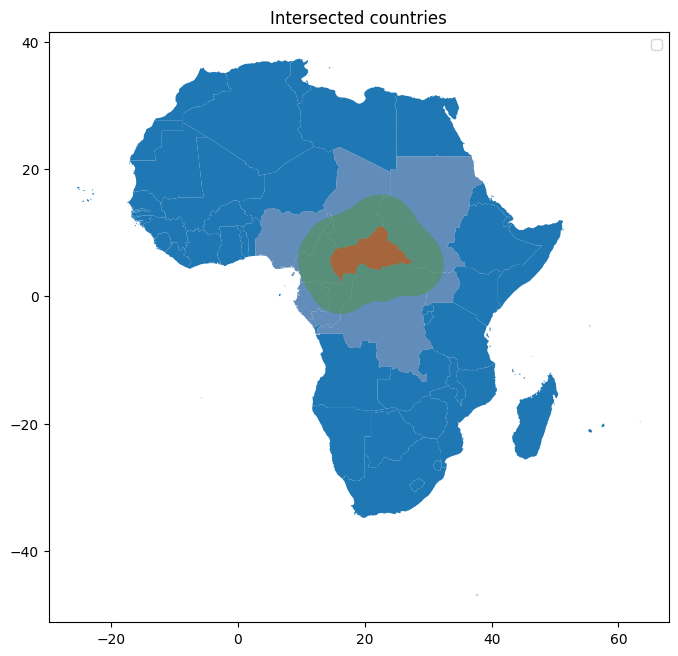

In [68]:
ax = africa.plot(figsize = (8, 8))
country.plot(ax = ax, color = 'red', figsize = (8, 8))
buff.plot(ax = ax, color = 'green', alpha=0.5, figsize = (8, 8))
intersect_buff.plot(ax = ax, color = 'pink', alpha=0.3, figsize = (8, 8))
plt.legend(["Africa continent", "Selected country", "Buffer", "Intersected country"])
plt.title('Intersected countries')
plt.show()

# End ^^